# Task -3 To Explore Unsupervised Learning 
### Predicting The optimum no. of clusters for iris dataset. In this we will anlayse the iris dataset and determine the clusters and visualise it.

## Importing relevant libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

## Importing Data Set

In [2]:
iris = pd.read_csv('iris.csv')
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## Data Exploration and Cleaning

In [3]:
iris.info()
# no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
df_species = iris['Species']
df_iris = iris.drop(['Id','Species'],axis = 1) #removing categorical data and index
df_iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


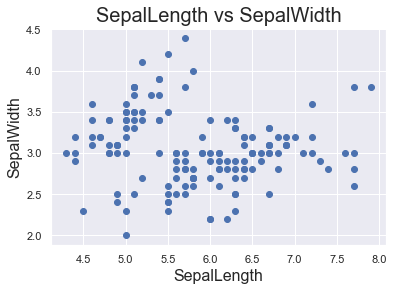

In [5]:
# plotting data and self predicting possible no. of clusters
# for sepal length and width
plt.scatter(df_iris['SepalLengthCm'],df_iris['SepalWidthCm'])

plt.title('SepalLength vs SepalWidth',fontsize = 20 )
plt.xlabel('SepalLength',fontsize =16)
plt.ylabel('SepalWidth',fontsize =16)
plt.show()
# by seeing graph we can analyse that 3-4 clusters will be optimal

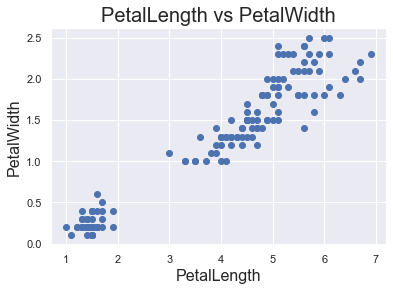

In [6]:
# for petal length and width
plt.scatter(df_iris['PetalLengthCm'],df_iris['PetalWidthCm'])

plt.title('PetalLength vs PetalWidth',fontsize = 20 )
plt.xlabel('PetalLength',fontsize =16)
plt.ylabel('PetalWidth',fontsize =16)
plt.show()
# by seeing graph we can analyse that 3 clusters will be optimal

## Analysing using Clustering
### WCSS vs No.of clusters

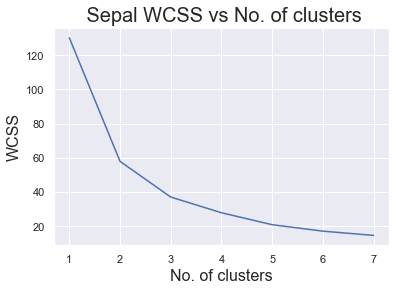

In [7]:
x = df_iris.iloc[:,:2]
wcss = []
for i in range (1,8):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss.append( kmeans.inertia_)
    
n= range(1,8)
plt.plot(n,wcss)

plt.title(' Sepal WCSS vs No. of clusters', fontsize = 20)
plt.xlabel('No. of clusters',fontsize = 16)
plt.ylabel('WCSS',fontsize = 16)
plt.show()
# 3 is optimal solution

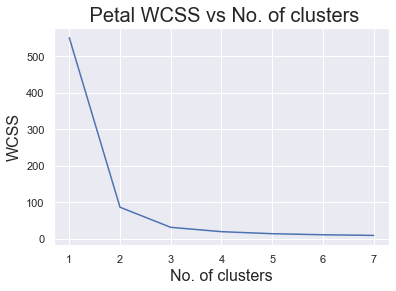

In [8]:
x = df_iris.iloc[:,2:]
wcss = []
for i in range (1,8):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss.append( kmeans.inertia_)
    
n= range(1,8)
plt.plot(n,wcss)

plt.title(' Petal WCSS vs No. of clusters', fontsize = 20)
plt.xlabel('No. of clusters',fontsize = 16)
plt.ylabel('WCSS',fontsize = 16)
plt.show()
# here also 3 is good solution

## Clustering

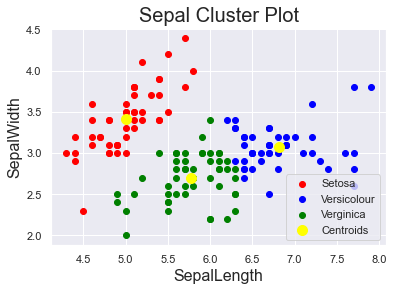

In [9]:
x = df_iris.iloc[:,:2]
kmeans = KMeans(3)
kmeans.fit(x)
clusters_labels = kmeans.fit_predict(x)
df_iris_clusters = df_iris.copy() #checkpoint
df_iris_clusters['Clusters'] = clusters_labels

da = df_iris_clusters[df_iris_clusters['Clusters'] == 0]
db = df_iris_clusters[df_iris_clusters['Clusters'] == 1]
dc = df_iris_clusters[df_iris_clusters['Clusters'] == 2]


plt.scatter(da.iloc[:,0], da.iloc[:,1], c = 'red', label = 'Setosa')
plt.scatter(db.iloc[:,0], db.iloc[:,1], c = 'blue', label = 'Versicolour')
plt.scatter(dc.iloc[:,0], dc.iloc[:,1], c = 'green', label = 'Verginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.title('Sepal Cluster Plot', fontsize = 20)
plt.xlabel('SepalLength', fontsize = 16)
plt.ylabel('SepalWidth', fontsize = 16)
plt.legend()
plt.show()


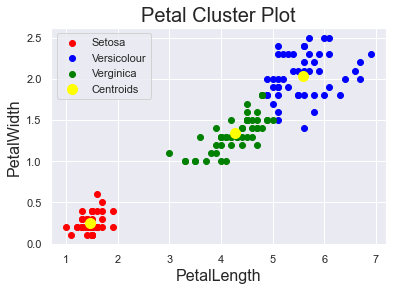

In [10]:
x = df_iris.iloc[:,2:]
kmeans = KMeans(3)
kmeans.fit(x)
clusters_labels = kmeans.fit_predict(x)
df_iris_clusters = df_iris.copy() #checkpoint

df_iris_clusters['Clusters'] = clusters_labels
da = df_iris_clusters[df_iris_clusters['Clusters'] == 0]
db = df_iris_clusters[df_iris_clusters['Clusters'] == 1]
dc = df_iris_clusters[df_iris_clusters['Clusters'] == 2]


plt.scatter(da.iloc[:,2], da.iloc[:,3], c = 'red', label = 'Setosa')
plt.scatter(db.iloc[:,2], db.iloc[:,3], c = 'blue', label = 'Versicolour')
plt.scatter(dc.iloc[:,2], dc.iloc[:,3], c = 'green', label = 'Verginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.title('Petal Cluster Plot', fontsize = 20)
plt.xlabel('PetalLength', fontsize = 16)
plt.ylabel('PetalWidth', fontsize = 16)
plt.legend()
plt.show()


## Conclusion

The Unsupervised learning is performed and the iris data is analysed using K_means clustering for k=3. 